# Resposta ao impulso unitário

Renato Naville Watanabe

## Preparação do ambiente

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Definição

A **resposta ao impulso unitário** (às vezes também chamada de **resposta impulsiva**) de um sistema discreto é o sinal de saída de um sistema quando um impulso unitário $\delta[n]$ é usado como sinal de entrada do sistema e inicialmente o sistema está em repouso. A resposta ao impulso é normalmente representada pela letra $h[n]$.

<img src=Imagens/diagimpulso.png width="400">

Para calcular a resposta ao impulso de um sistema de tempo discreto, basta colocar o sinal $\delta[n]$ como entrada do sistema, e calcular os valores de forma recursiva (existe uma outra maneira, mais eficiente, que veremos em outro momento).

---

### Exemplo 1

Por exemplo, para o sistema com a seguinte equação de diferença:

$$y[n] = 1x[n] - 0.6x[n-1] + 0.3x[n-2] + 0.1x[n-3]$$


Usando $x[n] = \delta[n]$, temos:

$h[0] = \delta[0] - 0.6 \delta[-1] + 0.3 \delta[-2] + 0.1 \delta[-3] = 1$

$h[1] = \delta[1] - 0.6 \delta[0] + 0.3 \delta[-1] + 0.1 \delta[-2] = -0.6$

$h[2] = \delta[2] - 0.6 \delta[1] + 0.3 \delta[0] + 0.1 \delta[-1] = 0.3$

$h[3] = \delta[3] - 0.6 \delta[2] + 0.3 \delta[1] + 0.1 \delta[0] = 0.1$

$h[4] = \delta[4] - 0.6 \delta[3] + 0.3 \delta[2] + 0.1 \delta[1] = 0$

$\vdots $

$h[k] = 0, k>3$

O gráfico da resposta ao impulso está abaixo:

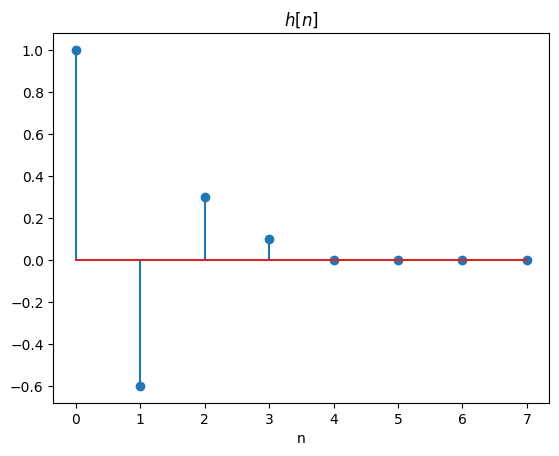

In [ ]:
def delta(k, N):
    impulso = np.zeros(N)
    impulso[k] = 1
    return impulso

x = delta(0, 8)
y = np.zeros_like(x)
for n in range(len(x)):
    y[n] = x[n] - 0.6*x[n-1]+0.3*x[n-2]+0.1*x[n-3]
plt.stem(y)
plt.title('$h[n]$')
plt.xlabel('n');

---

Sempre que o sistema depender apenas de valores da entrada, a resposta ao impulso será os coeficientes que multiplicam os valores da entrada. Esse tipo de sistema, que a saída depende apenas da entrada, é chamado de sistema ***moving average*** (na maioria das vezes se usa apenas a sigla **MA**).

Isso não acontece se o sinal de sáida do sistema depender também de valores passados da própria saída. 

---

### Exemplo 2

Considerando o sistema descrito pela seguinte equação de diferenças:

$$y[n] = 0.3y[n-1] - 0.2y[n-2] + 0.1x[n] - 0.2x[n-1]$$

Um diagrama de blocos para esse sistema está abaixo (tente se convencer que o diagrama de blocos abaixo representa essa equação de diferenças):

<img src=Imagens/diagexemploMAimpulso.png width="600">

Usando $x[n] = \delta[n]$, temos (te):

$h[0] =0.3h[-1] - 0.2h[-2] + 0.1\delta[0] - 0.2\delta[-1] = 0.1$

$h[1] = 0.3h[0] - 0.2h[-1] + 0.1\delta[1] - 0.2\delta[0] = -0.17$

$h[2] = 0.3h[1] - 0.2h[0] + 0.1\delta[2] - 0.2\delta[1] = -0.071$

$h[3] = 0.3h[2] - 0.2h[1] + 0.1\delta[3] - 0.2\delta[2] = 0.0127$

$h[4] = 0.3h[3] - 0.2h[2] + 0.1\delta[4] - 0.2\delta[3] = 0.01801$

$\vdots $


O gráfico da resposta ao impulso desse sistema é:

Text(0.5, 0, 'n')

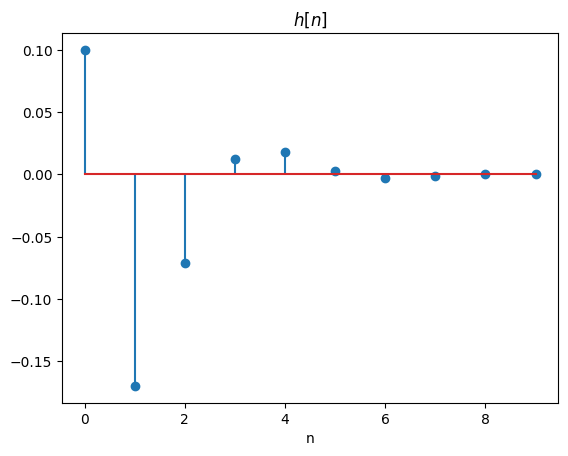

In [ ]:
x = delta(0, 10)
y = np.zeros_like(x)
for n in range(len(x)):
    y[n] = 0.3*y[n-1] - 0.2*y[n-2] + 0.1*x[n] - 0.2*x[n-1]
plt.stem(y)
plt.title('$h[n]$')
plt.xlabel('n')

Nesse caso, em que o sistema depende de valores passados da própria saída temos que calcular a resposta ao impulso de forma recursiva. Note que a resposta ao impulso desse sistema nunca vai para zero, embora conforme se avance no tempo os valores ficam muito pequenos. 

---

Quando a resposta ao impulso nunca vai para zero, como nesse caso, dizemos que a resposta ao impulso é **infinita** (na maioria das vezes, usamos a sigla em inglês **IIR**). Quando a resposta ao impulso vai para zero depois de algum tempo, como no primeiro exemplo, dizemos que a resposta ao impulso é **finita** (na maioria das vezes, usamos a sigla em inglês **FIR**).

Repare que no diagrama de blocos desse sistema aparececem dois caminhos cíclicos (realimentação ou *feedback*). Esses caminhos cíclicos sempre vão aparecer no diagrama de blocos quando o sistema depender de valores passados da própria saída. Os sistemas que têm uma dependência de valores passados da saída do próprio sistema são chamados de ***autoregressive moving average*** (na maioria das vezes se usa apenas a sigla **ARMA**).

Sempre que tivermos um sistema ARMA, a resposta ao impulso será infinita, devido às realimentações (caminhos cíclicos no diagrama de blocos) existentes no sistema. Um sistema MA sempre terá uma resposta ao impulso finita.

## Exercícios

**1)** Determine os 5 primeiros valores da resposta ao impulso dos seguintes sistemas:

a) $y[n+1] + 2y[n] = x[n]$

b) $y[n] = -3y[n-1] + x[n]$

c) 

<img src=Imagens/ex11diagA.png width="600">

d) $y[n] - 6y[n-1]+23y[n-2] - 3x[n] + 5x[n-1] = 0$

**2)** Dados dois sistemas conectados em série (S1, seguido de S2):

S1: $y_1[n] = 2x_1[n] - 2x_1[n-1]$

S2: $y_2[n] = 5x_2[n]-4x_2[n-1]$

Encontre a resposta ao impulso do sistema.

**3)**  Dados dois sistemas conectados em paralelo:

S1: $y_1[n] = 2x_1[n] - 2x_1[n-1]$

S2: $y_2[n] = 5x_2[n]-4x_2[n-1]$

Encontre a resposta ao impulso do sistema.

**4)** Considere o sistema abaixo:

$$y[n] = ny[n-1]+x[n] $$

$y[n] = 0$ para $n < 0$

a) Qual a resposta ao impulso do sistema? Encontre os 10 primeiros valores de $h[n]$.

b) O sistema é linear?

c) O sistema é invariante no tempo?

**5)** Indique se os sistemas que geraram as seguintes respostas ao impulso são ou não são causais:

a) $h_1[n] = 0.2^nu[n]$

b) $h_2[n] = (0.2)^nu[n-1]$

c) $h_3[n] = 0.2^{|n|}$

d) $h_4[n] = u[n+3] - u[n-3] $

e) $h_5[n] = 0.5^nu[n] + 2^nu[-n-1]$

**6)** Considere a seguinte equação de diferenças:

$$y[n] = ay[n-1] + x[n] $$

a) Encontre uma expressão para a resposta ao impulso do sistema $h[n]$ em função da constante $a$.

b) Para que faixa de valores de $a$ o sistema é estável?

## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007

## Solução dos exercícios

**2)** Resolvido por Catherine

Para o Sistema S1:
$$y_1[n] = 2x_1[n] - 2x_1[n-1]$$

$$y_{1,\delta}[n] = 2\delta[n] - 2\delta[n-1]$$

$$h_{1,\delta}[n] = 2\delta[n] - 2\delta[n-1]$$

Para o Sistema S2:
$$y_2[n] = 5x_2[n] - 4x_2[n-1]$$

$$x_2[n] = h_{1,\delta}[n] = 2\delta[n] - 2\delta[n-1]$$

Saída do Sistema S2 quando a entrada é $h_{1,\delta}[n]$:
$$y_{2,h_{1,\delta}}[n] = 5x_2[n] - 4x_2[n-1]$$
$$y_{2,h_{1,\delta}}[n] = 5(h_{1,\delta}[n]) - 4(h_{1,\delta}[n-1])$$
$$y_{2,h_{1,\delta}}[n] = 5(2\delta[n] - 2\delta[n-1]) - 4(2\delta[n-1] - 2\delta[n-2])$$
$$y_{2,h_{1,\delta}}[n] = 10\delta[n] - 10\delta[n-1] - 8\delta[n-1] + 8\delta[n-2]$$
$$y_{2,h_{1,\delta}}[n] = 10\delta[n] - 18\delta[n-1] + 8\delta[n-2]$$

A resposta ao impulso do sistema combinado (S1 em série com S2) é:
$$h_{\text{combinado}}[n] = y_{2,h_{1,\delta}}[n] = 10\delta[n] - 18\delta[n-1] + 8\delta[n-2]$$



**3)** Resolvido por Catherine

Para o Sistema S1:
$$y_1[n] = 2x_1[n] - 2x_1[n-1]$$

$$y_{1,\delta}[n] = 2\delta[n] - 2\delta[n-1]$$

$$h_{1,\delta}[n] = 2\delta[n] - 2\delta[n-1]$$

Para o Sistema S2:
$$y_2[n] = 5x_2[n] - 4x_2[n-1]$$

$$y_{2,\delta}[n] = 5\delta[n] - 4\delta[n-1]$$

$$h_{2,\delta}[n] = 5\delta[n] - 4\delta[n-1]$$

Somando as respostas ao impulso dos sistemas S1 e S2:

$$h_{\text{combinado},\delta}[n] = h_{1,\delta}[n] + h_{2,\delta}[n] = (2\delta[n] - 2\delta[n-1]) + (5\delta[n] - 4\delta[n-1])$$
$$h_{\text{combinado},\delta}[n] = 2\delta[n] + 5\delta[n] - 2\delta[n-1] - 4\delta[n-1]$$
$$h_{\text{combinado},\delta}[n] = 7\delta[n] - 6\delta[n-1]$$

**4)** Resolvido por Juliana Soares da Silva de Oliveira

a) 
Usando $x[n] = \delta[n]$, temos:

$h[0] = 0h[-1] + \delta[0] = 1$

$h[1] = 1h[0] + \delta[1] = 1$

$h[2] = 2h[1] + \delta[1] = 2$

$h[3] = 3h[2] + \delta[3] = 6$

$h[4] = 4h[3] + \delta[4] = 24$

$h[5] = 5h[4] + \delta[5] = 120$

$h[6] = 6h[5] + \delta[6] = 720$

$h[7] = 7h[6] + \delta[7] = 5040$

$h[8] = 8h[7] + \delta[8] = 40320$

$h[9] = 9h[8] + \delta[9] = 362880$

$\vdots $

O gráfico da resposta ao impulso está abaixo:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def delta(k, N):
    impulso = np.zeros(N)
    impulso[k] = 1
    return impulso

x = delta(0, 10)
y = np.zeros_like(x)
for n in range(len(x)):
    y[n] = n*y[n-1] + x[n]
plt.stem(y)
plt.title('$h[n]$')
plt.xlabel('n');

b) Um sistema linear é um sistema que segue o princípio da sobreposição. Por exemplo, no caso desse sistema podemos usar como entrada, $x_1[n] = u[n]$ e uma outra entrada $x_2[n] = \cos\left(\frac{\pi n}{15}\right)$. As saídas deste sistema em cada um dos casos são mostradas abaixo:

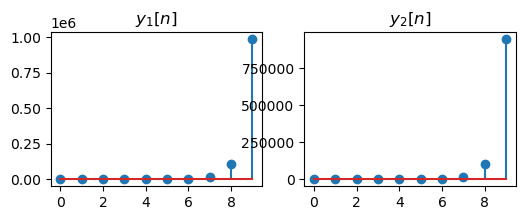

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 10
x1 = np.ones(N)
y1 = np.zeros(N)
for n in range(N):
    y1[n] = n*y1[n-1] + x1[n]
plt.stem(y1)
plt.title('$y_1[n]$')
plt.subplot(1,2,2)
x2 = np.cos(np.pi*np.arange(N)/15)
y2 = np.zeros(N)
for n in range(N):
    y2[n] = n*y2[n-1] + x2[n]
plt.stem(y2)
plt.title('$y_2[n]$');

Podemos agora construir um outro sinal de entrada, $x_3[n] = x_1[n] + x_2[n]$. Se esse sistema for linear, a saída do sistema para essa entrada deverá ser $y_1[n]+y_2[n]$. Abaixo estão os gráficos da saída do sistema para $x_3[n]$ e $y_1[n]+y_2[n]$.

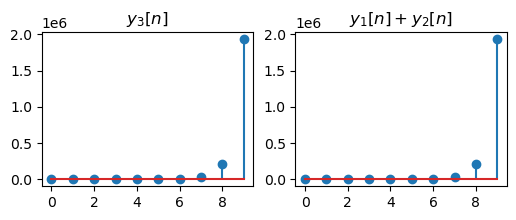

In [4]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 10
x3 = np.ones(N) + np.cos(np.pi*np.arange(N)/15)
y3 = np.zeros(N)
for n in range(N):
    y3[n] = n*y3[n-1] + x3[n]
plt.stem(y3)
plt.title('$y_3[n]$')
plt.subplot(1,2,2)
plt.stem(y1+y2)
plt.title('$y_1[n]+y_2[n]$');

As saídas são iguais, então concluímos que o sistema é **linear**.

c) Um sistema é dito ser invariante no tempo se colocarmos a mesma entrada em momentos diferentes, as saídas obtidas serão as mesmas, exceto pela diferença no tempo. No caso do sistema em questão, não é invariante no tempo pois sempre que o tempo $n$ está multiplicando a equação, o sistema é **variante no tempo**.

**5)** Resolvido por Catherine

Um sistema é considerado causal se a resposta ao impulso for não nula apenas para índices de tempo não negativos.

Vamos analisar cada resposta ao impulso:

a) $h_1[n] = 0.2^n u[n]$
   - Essa resposta ao impulso é multiplicada por $u[n]$, que é a função degrau unitário. Portanto, a resposta ao impulso é não nula apenas para $n \geq 0$, o que indica que o sistema é causal.

b) $h_2[n] = (0.2)^n u[n-1]$
   - Neste caso, a resposta ao impulso é multiplicada por $u[n-1]$, o que faz com que ela seja não nula apenas para $n \geq 1$. Isso indica que o sistema é causal.

c) $h_3[n] = 0.2^{|n|}$
   - A resposta ao impulso não é multiplicada por uma função degrau. No entanto, ela é simétrica em relação a $n=0$, o que significa que é não nula tanto para $n \geq 0$ quanto para $n < 0$. Portanto, o sistema não é causal.

d) $h_4[n] = u[n+3] - u[n-3]$
   - Essa resposta ao impulso é a diferença de duas funções degrau. A primeira parte ($u[n+3]$) é não nula apenas para $n \geq -3$, e a segunda parte ($u[n-3]$) é não nula apenas para $n \geq 3$. Isto indica  que o sistema é não-causal.

e) $h_5[n] = 0.5^n u[n] + 2^n u[-n-1]$
   - A primeira parte da resposta ao impulso ($0.5^n u[n]$) é não nula apenas para $n \geq 0$, indicando causalidade. A segunda parte ($2^n u[-n-1]$) é não nula apenas para $n \leq 11$, o que significa que o sistema também é não-causal.

**6)** Resolvido por Juliana Soares da Silva de Oliveira

a)
$y[n] = ay[n-1] + x[n]$

$h[n] = ah[n-1] + δ[n]$

$n=0, h[0] = ah[-1] + δ[0] = 1$

$n=1, h[1] = ah[0] + δ[1] = a$

$n=2, h[2] = ah[1] + δ[2] = a^2$

$n=3, h[3] = ah[2] + δ[3] = a^3$

$n=4, h[4] = ah[3] + δ[4] = a^4$

$\text{portanto}, h[n] = a^nu[n]$

b) O sistema é estável quando $|a| < 1$. Caso contrário a saída aumenta exponencialmente, pois a resposta ao impulso em função da constante é $a^n$.